In [25]:
import pandas as pd #libraries for this project 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
dfgames=pd.read_csv('vgsales.csv') #dataset

In [27]:
dfgames.head(10) # show the data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


<BarContainer object of 16598 artists>

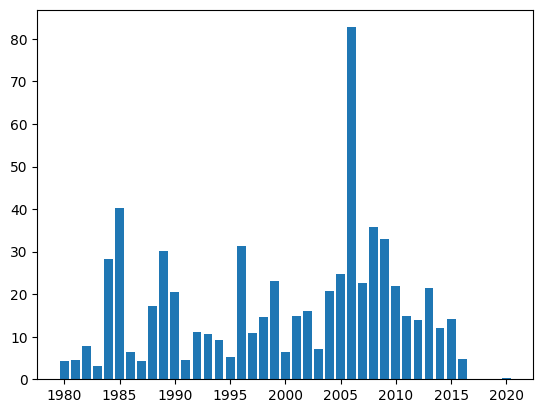

In [28]:
plt.bar(dfgames['Year'], dfgames['Global_Sales']) #know the target

<Axes: >

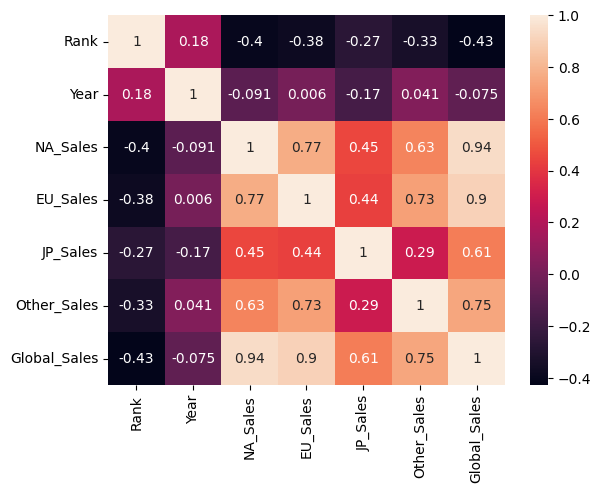

In [29]:
sns.heatmap(data=dfgames.select_dtypes('number').corr(), annot=True) # visualization for relationship between the variables

In [30]:
dfgames.isnull().sum() #empty values

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [31]:
dfgames.dropna()# delete irrelvants rows 

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [32]:
dfgames['Genre']=dfgames['Genre'].map({'Action':1,'Sports':2,'Misc':3,'Role-Playing':4,'Shooter':5,#categorics variables 
                                       'Adventure':6,'Racing':7,'Platform':8,'Simulation':9,
                                      'Fighting':10, 'Strategy':11,'Puzzle':12})



In [33]:
dfgames.drop(['Platform', 'Name', 'Publisher'],axis=1) # minimize non-relevant variables

,Rank,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,2006.0,2,41.49,29.02,3.77,8.46,82.74
1,2,1985.0,8,29.08,3.58,6.81,0.77,40.24
2,3,2008.0,7,15.85,12.88,3.79,3.31,35.82
3,4,2009.0,2,15.75,11.01,3.28,2.96,33.00
4,5,1996.0,4,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...
16593,16596,2002.0,8,0.01,0.00,0.00,0.00,0.01
16594,16597,2003.0,5,0.01,0.00,0.00,0.00,0.01
16595,16598,2008.0,7,0.00,0.00,0.00,0.00,0.01
16596,16599,2010.0,12,0.00,0.01,0.00,0.00,0.01


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [35]:
x=dfgames[['Rank', 'Year', 'Genre','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] #separate the independent variables and dependent variable
y=dfgames['Global_Sales']

In [36]:
x=x.fillna(x.mean()) # use missing data
y=y[x.index]
x.shape

(16598, 7)

In [37]:
y.shape


(16598,)

In [38]:
xtrain, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=11)#important is the way the variables are organized, the order
#in training and test data

In [39]:
model=LinearRegression() #create the model
model.fit(xtrain,y_train)

LinearRegression()

In [40]:
prediction=model.predict(X_test) #prediction


In [41]:
print (prediction)

[0.13034685 0.15040053 0.22027129 ... 0.02069816 0.03074431 0.10059625]


In [42]:
ypredic=prediction

In [43]:

y_pred = model.predict(X_test) # evaluate the error 

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 2.7687639328474514e-05


In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error') #evaluate the model 
scores

array([-1.29629480e-04, -3.29889247e-05, -2.77671417e-05, -2.38288900e-05,
       -1.74651643e-05])

In [46]:
mse_scores = -scores


In [47]:
mean_mse = np.mean(mse_scores) #evaluate the model again (cross validation)
std_mse = np.std(mse_scores)
print(f'Mean Squared Error: {mean_mse}')
print(f'Standard Deviation of MSE: {std_mse}')

Mean Squared Error: 4.6335920116498356e-05
Standard Deviation of MSE: 4.1954370133920284e-05


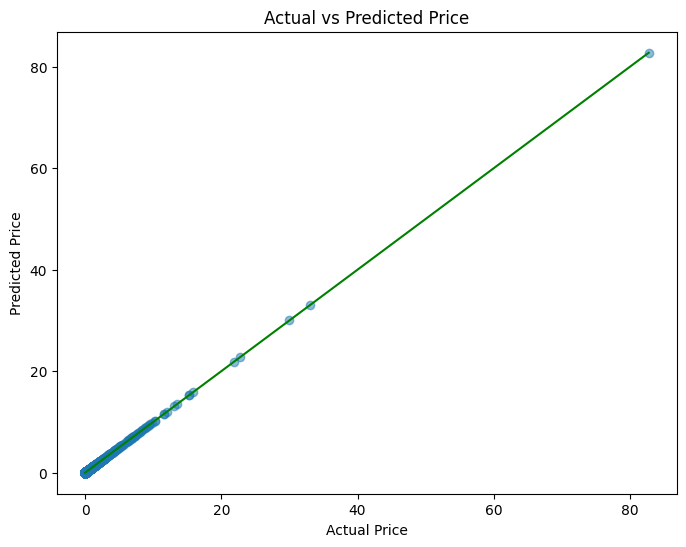

In [48]:
plt.figure(figsize=(8, 6)) #graphic between price actual and prediction 
plt.scatter(y_test, prediction, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green')
plt.show()
